<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1">Import Libraries</a></span></li><li><span><a href="#Worksheet-Practice:" data-toc-modified-id="Worksheet-Practice:-2">Worksheet Practice:</a></span><ul class="toc-item"><li><span><a href="#Procedure:" data-toc-modified-id="Procedure:-2.1">Procedure:</a></span></li></ul></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-3">Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#logins" data-toc-modified-id="logins-3.1">logins</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4">Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Separate-categorical-and-numerical-features" data-toc-modified-id="Separate-categorical-and-numerical-features-4.1">Separate categorical and numerical features</a></span></li><li><span><a href="#encode-categorical-features" data-toc-modified-id="encode-categorical-features-4.2">encode categorical features</a></span></li><li><span><a href="#scale-numerical-values" data-toc-modified-id="scale-numerical-values-4.3">scale numerical values</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-5">Modeling</a></span><ul class="toc-item"><li><span><a href="#Define-train,-test-sets" data-toc-modified-id="Define-train,-test-sets-5.1">Define train, test sets</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-5.2">Logistic Regression</a></span></li><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-5.3">Decision Tree Classifier</a></span></li><li><span><a href="#Regression-Coefficients" data-toc-modified-id="Regression-Coefficients-5.4">Regression Coefficients</a></span></li><li><span><a href="#Decision-Tree-Coeffcients" data-toc-modified-id="Decision-Tree-Coeffcients-5.5">Decision Tree Coeffcients</a></span><ul class="toc-item"><li><span><a href="#Plot-feature-importances" data-toc-modified-id="Plot-feature-importances-5.5.1">Plot feature importances</a></span></li></ul></li></ul></li></ul></div>

# Import Libraries

In [537]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

import graphviz
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns


%matplotlib inline

# Worksheet Practice:

## Procedure:

1. Data Wrangling  <br>
 - NaN, missing values  <br>
    - filling in missing/NaN  
 - data types modification  
<br>

2.  Exploratory Data Analysis  <br>
 - mean, median, std of values for each feature  <br>
 - correlation between features  <br>
 - Principal Component Analysis (PCA)  <br>
        - which features are reponsible for most variable. 

3.  Modeling <br>
 - Identify target variable <br>
 - Identify categorical and numerical features <br>
        1.  one hot encode categorical features  <br>
        2.  standard scale numerical  <br>
 - split in train and test sets  <br>
 - train model  <br>
 - predict model  <br>
 - evaluate performance metrics  <br>
        1.  accuracy  <br>
        2.  precision <br>
        3.  recall <br>
 - tune model parameters  <br>
 - reevaluate performance metrics <br>
        1.  accuracy  <br>
        2.  precision  <br>
        3.  recall  <br>



# Data Wrangling

## logins

Notes:

1.  avg_rating_of_driver, avg_rating_by_driver values:

16.24% of avg_rating_of_driver values are null
0.40% of avg_rating_by values are null



In [538]:
df = pd.read_json('./ultimate_data_challenge.json')

In [539]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [540]:
# dataframe:  50000 entries, 14 features

print(df.shape)
df.nunique()

(50000, 12)


city                         3
trips_in_first_30_days      59
signup_date                 31
avg_rating_of_driver        37
avg_surge                  115
last_trip_date             182
phone                        2
surge_pct                  367
ultimate_black_user          2
weekday_pct                666
avg_dist                  2908
avg_rating_by_driver        27
dtype: int64

In [541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [542]:
print("{:.2f}% of avg_rating_of_driver values are null".format(df['avg_rating_of_driver'].isna().sum()
                                                              / df.shape[0] * 100))

print("{:.2f}% of avg_rating_by values are null".format(df['avg_rating_by_driver'].isna().sum()
                                                              / df.shape[0] * 100))

16.24% of avg_rating_of_driver values are null
0.40% of avg_rating_by values are null


In [543]:
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(method = 'ffill')
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(method = 'ffill')

In [544]:
df.shape

(50000, 12)

In [545]:
# change signup_date, last_trip_date to datetime 

df['signup_date'] = pd.to_datetime(df.signup_date)
df['last_trip_date'] = pd.to_datetime(df.last_trip_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [546]:
# this will be last date of sampling period.
df.last_trip_date.max()

Timestamp('2014-07-01 00:00:00')

In [547]:
# find all rows that are active users.  this means last_trip_date value is within 30 days of 2014-07-01.
# create a new column, 'active', that will be used to identify active users in modeling.  a value of 1 in the 
# 'active' column will indicate active users.  a value of 0 will be non-active users.

df_ = df[df.last_trip_date >= '2014-06-01']
df_ = df_.reset_index()
df_

,index,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
2,5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
3,13,King's Landing,0,2014-01-29,4.0,1.38,2014-06-08,iPhone,50.0,False,50.0,3.04,5.0
4,16,King's Landing,1,2014-01-11,5.0,1.00,2014-06-28,Android,0.0,True,50.0,10.86,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18799,49976,King's Landing,0,2014-01-21,2.0,1.00,2014-07-01,iPhone,0.0,False,100.0,2.39,4.0
18800,49988,King's Landing,1,2014-01-20,4.5,1.00,2014-06-14,iPhone,0.0,False,50.0,2.53,5.0
18801,49991,Winterfell,0,2014-01-08,5.0,1.25,2014-06-29,iPhone,100.0,False,0.0,1.06,5.0
18802,49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,True,55.6,2.53,4.7


In [548]:
# create 'active' feature columns with 1's for values.  this will indicate active users.

x = pd.DataFrame(np.ones_like(df_.city), columns = ['active'])
x

,active
0,1
1,1
2,1
3,1
4,1
...,...
18799,1
18800,1
18801,1
18802,1


In [549]:
# df_active contains all users who qualify as active

df_active = pd.concat([df_,x], axis = 1)
df_active

,index,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
2,5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,1
3,13,King's Landing,0,2014-01-29,4.0,1.38,2014-06-08,iPhone,50.0,False,50.0,3.04,5.0,1
4,16,King's Landing,1,2014-01-11,5.0,1.00,2014-06-28,Android,0.0,True,50.0,10.86,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18799,49976,King's Landing,0,2014-01-21,2.0,1.00,2014-07-01,iPhone,0.0,False,100.0,2.39,4.0,1
18800,49988,King's Landing,1,2014-01-20,4.5,1.00,2014-06-14,iPhone,0.0,False,50.0,2.53,5.0,1
18801,49991,Winterfell,0,2014-01-08,5.0,1.25,2014-06-29,iPhone,100.0,False,0.0,1.06,5.0,1
18802,49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,True,55.6,2.53,4.7,1


In [550]:
# use similar process as above to identify inactive users, ie. no trips in preceding 30 days.

df_inactive = df[df.last_trip_date < '2014-06-01']
df_inactive = df_inactive.reset_index()
df_inactive

,index,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
1,2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
2,4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
3,6,Astapor,1,2014-01-24,3.5,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
4,7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31191,49994,Astapor,1,2014-01-03,4.6,1.44,2014-05-31,iPhone,37.5,False,25.0,2.25,4.5
31192,49996,Astapor,1,2014-01-24,5.0,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
31193,49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
31194,49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [551]:
# create 'active' column with zero values to indicate inactive users.

x = pd.DataFrame(np.zeros_like(df_inactive.city), columns = ['active'])
x

,active
0,0
1,0
2,0
3,0
4,0
...,...
31191,0
31192,0
31193,0
31194,0


In [552]:
# concat df_inactive and x to merge data for inactive users

df_inactive = pd.concat([df_inactive,x], axis = 1)
df_inactive


,index,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
1,2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
2,4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
3,6,Astapor,1,2014-01-24,3.5,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0,0
4,7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31191,49994,Astapor,1,2014-01-03,4.6,1.44,2014-05-31,iPhone,37.5,False,25.0,2.25,4.5,0
31192,49996,Astapor,1,2014-01-24,5.0,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0
31193,49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0
31194,49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,0


In [553]:
# concat inactive and active users data

df = pd.concat([df_active,df_inactive])
df

,index,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
2,5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,1
3,13,King's Landing,0,2014-01-29,4.0,1.38,2014-06-08,iPhone,50.0,False,50.0,3.04,5.0,1
4,16,King's Landing,1,2014-01-11,5.0,1.00,2014-06-28,Android,0.0,True,50.0,10.86,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31191,49994,Astapor,1,2014-01-03,4.6,1.44,2014-05-31,iPhone,37.5,False,25.0,2.25,4.5,0
31192,49996,Astapor,1,2014-01-24,5.0,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0
31193,49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0
31194,49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,0


In [554]:
df = df.sort_values('index')
df

,index,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
0,1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
1,2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
1,3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
2,4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18803,49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,1
31192,49996,Astapor,1,2014-01-24,5.0,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0
31193,49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0
31194,49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,0


In [555]:
df.index = df['index']
df

,index,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
index,,,,,,,,,,,,,,
0,0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,1
49996,49996,Astapor,1,2014-01-24,5.0,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0
49997,49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0


In [556]:
df.index.name = None
df

,index,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,1
49996,49996,Astapor,1,2014-01-24,5.0,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0
49997,49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0
49998,49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,0


In [557]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   50000 non-null  int64         
 1   city                    50000 non-null  object        
 2   trips_in_first_30_days  50000 non-null  int64         
 3   signup_date             50000 non-null  datetime64[ns]
 4   avg_rating_of_driver    50000 non-null  float64       
 5   avg_surge               50000 non-null  float64       
 6   last_trip_date          50000 non-null  datetime64[ns]
 7   phone                   49604 non-null  object        
 8   surge_pct               50000 non-null  float64       
 9   ultimate_black_user     50000 non-null  bool          
 10  weekday_pct             50000 non-null  float64       
 11  avg_dist                50000 non-null  float64       
 12  avg_rating_by_driver    50000 non-null  float6

In [558]:
df.active = df.active.astype('int')

# Exploratory Data Analysis

## Separate categorical and numerical features

In [559]:
# Store ignore and active column names
ignore = ['index','signup_date', 'last_trip_date']
target = ['active']

# Store categorical column names
categorical = df.nunique()[df.nunique() < 5].keys().to_list()

# Remove target from the list of categorical variables
categorical.remove(target[0])

# Store numerical column names
numerical = [x for x in df.columns if x not in ignore + target + categorical]

In [560]:
numerical

['trips_in_first_30_days',
 'avg_rating_of_driver',
 'avg_surge',
 'surge_pct',
 'weekday_pct',
 'avg_dist',
 'avg_rating_by_driver']

In [561]:
categorical

['city', 'phone', 'ultimate_black_user']

## encode categorical features

In [562]:
# Perform one-hot encoding to categorical variables 
# increase number of feature columns to 18 from 14.
df_encode = pd.get_dummies(data = df[categorical], columns = categorical, drop_first=True)
df_encode.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   city_King's Landing       50000 non-null  uint8
 1   city_Winterfell           50000 non-null  uint8
 2   phone_iPhone              50000 non-null  uint8
 3   ultimate_black_user_True  50000 non-null  uint8
dtypes: uint8(4)
memory usage: 585.9 KB


## scale numerical values

In [563]:
# Initialize StandardScaler instance
scaler = StandardScaler()

# Fit and transform the scaler on numerical columns
scaled_numerical = scaler.fit_transform(df[numerical])

# Build a DataFrame from scaled_numerical
scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical)

scaled_numerical

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
0,0.453984,0.162386,0.113506,0.328202,-0.397131,-0.372650,0.496725
1,-0.600689,0.647669,-0.336268,-0.443394,-0.294653,0.431583,0.496725
2,0.190316,-0.484659,-0.336268,-0.443394,1.053741,-0.880771,0.496725
3,1.772325,0.000624,0.293416,0.558679,0.514383,-0.602181,0.272774
4,3.090665,-0.322898,0.518303,0.147829,0.579106,-0.467266,0.272774
...,...,...,...,...,...,...,...
49995,-0.600689,0.647669,-0.336268,-0.443394,1.053741,-0.029230,-1.294890
49996,-0.337021,0.647669,-0.336268,-0.443394,-1.643048,-1.015686,-1.742794
49997,-0.600689,0.647669,-0.336268,-0.443394,1.053741,-0.339360,0.496725
49998,-0.073352,-2.587554,-0.336268,-0.443394,1.053741,-0.213205,-2.862554


In [564]:
# join one hot encoded categorical features, standard scaled numerical features, and active values to create
# df

df_ = pd.concat([df_encode, scaled_numerical], axis = 1)
df_ = pd.concat([df_, df['active']], axis = 1)
df = df_



# Modeling

## Define train, test sets

In [565]:
# Print the unique active values
print(set(df['active']))

# Calculate the ratio size of each churn group
print(df.groupby(['active']).size() / df.shape[0] * 100)

# Split the data into train and test
train, test = train_test_split(df, test_size = .25)

{0, 1}
active
0    62.392
1    37.608
dtype: float64


In [566]:
# Store column names from `df` excluding target variable and ignore
cols = [col for col in df.columns if col not in ignore + target]

cols

["city_King's Landing",
 'city_Winterfell',
 'phone_iPhone',
 'ultimate_black_user_True',
 'trips_in_first_30_days',
 'avg_rating_of_driver',
 'avg_surge',
 'surge_pct',
 'weekday_pct',
 'avg_dist',
 'avg_rating_by_driver']

In [567]:
# Extract training features
train_X = train[cols]

# Extract training target
train_Y = train[target]

# Extract testing features
test_X = test[cols]

# Extract testing target
test_Y = test[target]

In [568]:
train_Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37500 entries, 33239 to 6785
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   active  37500 non-null  int64
dtypes: int64(1)
memory usage: 585.9 KB


In [569]:
train_Y.values.ravel()


array([0, 1, 0, ..., 0, 1, 0])

## Logistic Regression

In [570]:
logreg = LogisticRegression()

# Fit logistic regression on training data
logreg.fit(train_X, train_Y.values.ravel())

# Predict active labels on testing data
pred_test_Y = logreg.predict(test_X)

# Calculate accuracy score on testing data
test_accuracy = accuracy_score(test_Y.values.ravel(), pred_test_Y)

# Print test accuracy score rounded to 4 decimals
print('Test accuracy:', round(test_accuracy, 4))

Test accuracy: 0.7146


In [571]:
# logistic regression with L1 regularization

# Initialize logistic regression instance 
logreg =LogisticRegression(penalty='l1', C=0.025, solver='liblinear')

# Fit the model on training data
logreg.fit(train_X, train_Y.values.ravel())

# Predict churn values on test data
pred_test_Y = logreg.predict(test_X)

# Print the accuracy score on test data
print('Test accuracy:', round(accuracy_score(test_Y.values.ravel(), pred_test_Y), 4))

Test accuracy: 0.7174


In [572]:
# best value of C is 0.025?, recall is 0.49410, Coeffs is 10.


C = [1, 0.5, 0.25, 0.1, 0.05, 0.025, 0.01, 0.005, 0.0025]
l1_metrics = np.array([[1.    , 0.    , 0.    ], [0.5   , 0.    , 0.    ],[0.25  , 0.    , 0.    ],[0.1   , 0.    , 0.    ],
       [0.05  , 0.    , 0.    ], [0.025 , 0.    , 0.    ], [0.01  , 0.    , 0.    ],
       [0.005 , 0.    , 0.    ], [0.0025, 0.    , 0.    ]])


# Run a for loop over the range of C list length
for index in range(0, len(C)):
  # Initialize and fit Logistic Regression with the C candidate
  logreg = LogisticRegression(penalty='l1', C=C[index], solver='liblinear')
  logreg.fit(train_X, train_Y.values.ravel())
  # Predict churn on the testing data
  pred_test_Y = logreg.predict(test_X)
  # Create non-zero count and recall score columns
  l1_metrics[index,1] = np.count_nonzero(logreg.coef_)
  l1_metrics[index,2] = recall_score(test_Y.values.ravel(), pred_test_Y)

# Name the columns and print the array as pandas DataFrame
col_names = ['C','Non-Zero Coeffs','Recall']
print(pd.DataFrame(l1_metrics, columns=col_names))

        C  Non-Zero Coeffs    Recall
0  1.0000             11.0  0.489334
1  0.5000             11.0  0.489121
2  0.2500             11.0  0.488695
3  0.1000             11.0  0.488481
4  0.0500             10.0  0.486561
5  0.0250             10.0  0.483148
6  0.0100              9.0  0.468857
7  0.0050              9.0  0.445179
8  0.0025              6.0  0.406783


## Decision Tree Classifier

In [577]:
# Initialize decision tree classifier
mytree = tree.DecisionTreeClassifier()

# Fit the decision tree on training data
mytree.fit(train_X, train_Y)

# Predict churn labels on testing data
pred_test_Y = mytree.predict(test_X)

# Calculate accuracy score on testing data
test_accuracy = accuracy_score(test_Y, pred_test_Y)

# Print test accuracy
print('Test accuracy:', round(test_accuracy, 4))

Test accuracy: 0.7054


In [574]:
# best depth value is 2.  produces maximum recall of 0.76

depth_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

depth_tuning = np.array([[ 2.,  0.],
       [ 3.,  0.],
       [ 4.,  0.],
       [ 5.,  0.],
       [ 6.,  0.],
       [ 7.,  0.],
       [ 8.,  0.],
       [ 9.,  0.],
       [10.,  0.],
       [11.,  0.],
       [12.,  0.],
       [13.,  0.],
       [14.,  0.]])

# Run a for loop over the range of depth list length
for index in range(0, len(depth_list)):
  # Initialize and fit decision tree with the `max_depth` candidate
  mytree = DecisionTreeClassifier(max_depth=depth_list[index])
  mytree.fit(train_X, train_Y)
  # Predict churn on the testing data
  pred_test_Y = mytree.predict(test_X)
  # Calculate the recall score 
  depth_tuning[index,1] = recall_score(test_Y, pred_test_Y)

# Name the columns and print the array as pandas DataFrame
col_names = ['Max_Depth','Recall']
print(pd.DataFrame(depth_tuning, columns=col_names))

    Max_Depth    Recall
0         2.0  0.758106
1         3.0  0.571459
2         4.0  0.616894
3         5.0  0.579352
4         6.0  0.654650
5         7.0  0.636519
6         8.0  0.644625
7         9.0  0.652517
8        10.0  0.630333
9        11.0  0.631186
10       12.0  0.634386
11       13.0  0.628626
12       14.0  0.631399


## Regression Coefficients

In [575]:
# Combine feature names and coefficients into pandas DataFrame
feature_names = pd.DataFrame(train_X.columns, columns=['Feature'])
log_coef = pd.DataFrame(np.transpose(logreg.coef_), columns=['Coefficient'])
coefficients = pd.concat([feature_names, log_coef], axis = 1)

# Calculate exponent of the logistic regression coefficients
coefficients['Exp_Coefficient'] = np.exp(coefficients['Coefficient'])

# Remove coefficients that are equal to zero
coefficients = coefficients[coefficients['Coefficient']!=0]

# Print the values sorted by the exponent coefficient
print(coefficients.sort_values(by=['Exp_Coefficient']))

                     Feature  Coefficient  Exp_Coefficient
9                   avg_dist    -0.121264         0.885800
10      avg_rating_by_driver    -0.032940         0.967596
4     trips_in_first_30_days     0.396993         1.487346
3   ultimate_black_user_True     0.515968         1.675260
2               phone_iPhone     0.582152         1.789886
0        city_King's Landing     0.991950         2.696489


## Decision Tree Coeffcients

### Plot feature importances

In [580]:
print("Feature importances:")
print(mytree.feature_importances_)

Feature importances:
[0.07130207 0.01844466 0.03580521 0.02633593 0.06561963 0.08009565
 0.04301325 0.06088952 0.10963913 0.30593281 0.18292214]


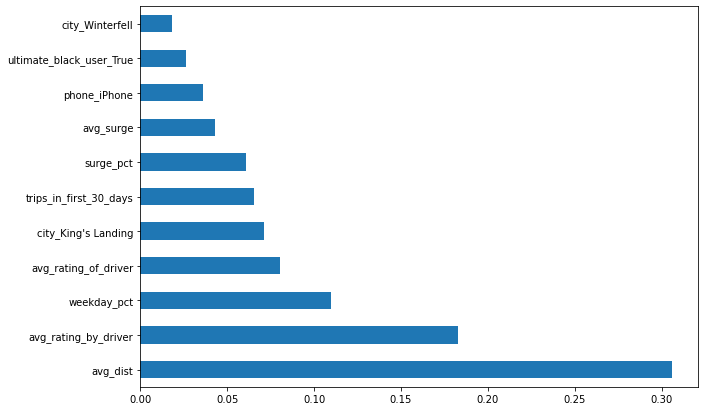

In [589]:
# avg_dist is the most important feature in predicting active user status.  avg_rating_by_driver
# is the second most important feature in predicting active user status.

# plot the 7 most important features 
plt.figure(figsize=(10,7))
feat_importances = pd.Series(mytree.feature_importances_, index = train_X.columns)
feat_importances.nlargest(14).plot(kind='barh');